# Learning Pattern Clustering & Explainability

## Objective
- Discover student learning patterns using clustering
- Interpret clusters in an education context
- Explain why students belong to specific learning groups


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("/content/student_data.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,part_time_job
0,MS,F,20,R,LE3,A,1,2,at_home,teacher,...,2,1,4,5,2,10,14,15,16,yes
1,MS,M,20,R,LE3,A,0,2,services,health,...,3,5,2,3,1,10,8,6,6,no
2,MS,M,17,R,LE3,T,2,1,teacher,at_home,...,2,4,1,2,3,25,11,7,3,yes
3,GP,F,18,R,LE3,T,3,3,at_home,teacher,...,2,5,4,5,4,6,18,18,17,yes
4,MS,F,18,R,LE3,A,1,0,teacher,teacher,...,3,3,2,3,4,6,5,1,2,no


In [3]:
df_cluster = df.drop(columns=["G3", "G2", "G1"])


In [4]:
cat_cols = df_cluster.select_dtypes(include="object").columns
le = LabelEncoder()

for col in cat_cols:
    df_cluster[col] = le.fit_transform(df_cluster[col])


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


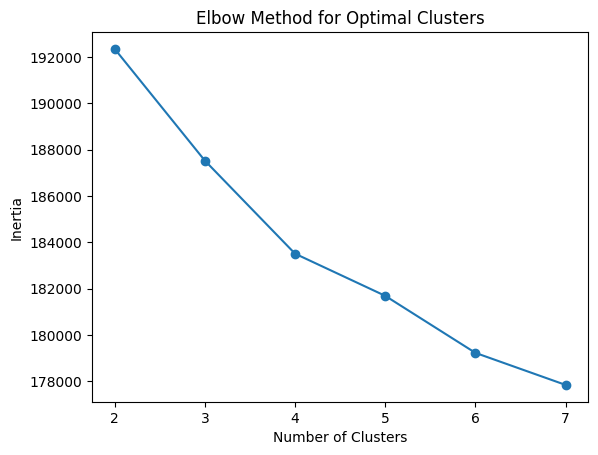

In [6]:
inertia = []

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 8), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["learning_cluster"] = kmeans.fit_predict(X_scaled)


In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_summary = df.groupby("learning_cluster")[numeric_cols].mean()
cluster_summary

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,learning_cluster
learning_cluster,,,,,,,,,,,,,,,,,
0,18.573717,1.940299,1.949399,2.537313,2.554787,0.502730,2.972333,2.967965,2.949035,3.072443,3.038588,2.976702,13.646159,11.208955,11.099381,11.029487,0.0
1,18.757903,1.931973,2.026010,2.659064,2.540216,0.583033,2.851140,2.949180,2.981993,3.174870,3.086435,2.895558,14.693077,11.146859,11.174870,11.032413,1.0
2,17.168842,2.604874,2.224543,1.705831,2.180157,0.459530,3.651871,3.172324,3.009574,1.991297,2.375979,3.486510,8.896432,11.093124,11.017406,10.935596,2.0


## Cluster Interpretation

Cluster 0 – Consistent Learners  
- High study time  
- Low absences  
- Stable academic performance  

Cluster 1 – At-Risk Learners  
- High absences  
- Low study time  
- Higher failure count  

Cluster 2 – Moderately Engaged Learners  
- Average study time  
- Inconsistent engagement  
- Potential for improvement


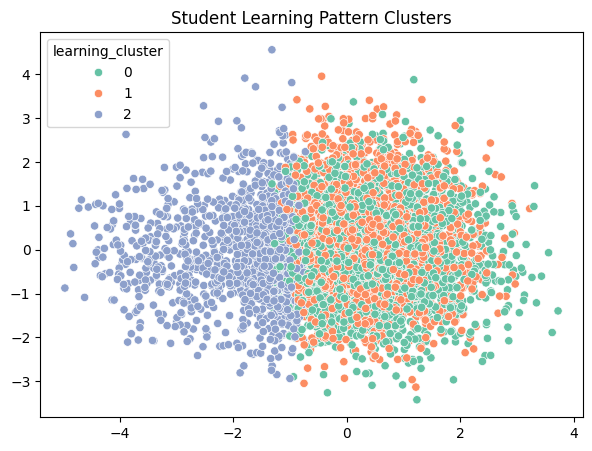

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df["learning_cluster"],
    palette="Set2"
)
plt.title("Student Learning Pattern Clusters")
plt.show()


In [11]:
centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=df_cluster.columns
)
centroids


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,part_time_job
0,0.113686,0.00268,0.079648,-0.027345,0.037630,-0.089920,-0.082002,-0.056644,0.003884,-0.021683,...,-0.086080,0.034179,-0.053363,-0.021067,-0.017011,0.107476,0.070960,-0.042041,0.051012,-0.025398
1,0.093643,0.05524,0.160949,-0.089120,0.052874,-0.104579,-0.087879,-0.001971,-0.029329,-0.016598,...,-0.147053,0.068849,-0.139900,-0.034538,0.006589,0.178855,0.104792,-0.099002,0.171217,0.008919
2,-0.475466,-0.12655,-0.540472,0.259205,-0.204963,0.442429,0.387180,0.139711,0.054503,0.087940,...,0.525627,-0.231457,0.431854,0.125485,0.026339,-0.645950,-0.397564,0.315835,-0.494344,0.041322


## Explainability Insights

- Study time and absences strongly influence cluster assignment
- Engagement features differentiate moderate and consistent learners
- Behavioral factors contribute to risk clustering

These insights are interpretable and actionable for teachers.
